In [1]:
# load dataset
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)

# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.transform(X_test)

# Training model
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

model = MLPRegressor(
    hidden_layer_sizes=(32, 64),
    activation='relu',
    solver='adam',
    random_state=42,
    max_iter=1000
)

model.fit(X_train_scaled, y_train)

# evaluasi model
y_pred = model.predict(X_test_scaled)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
print('Cross-validated R2 scores:', scores)
print('Mean R2:', scores.mean())

c:\Users\Formylife\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MSE:  2591.2990699329225
R2:  0.5109050867298308


c:\Users\Formylife\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Formylife\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Formylife\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Formylife\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validated R2 scores: [0.47615636 0.1431508  0.4925794  0.55601952 0.34030661]
Mean R2: 0.4016425375910945


c:\Users\Formylife\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


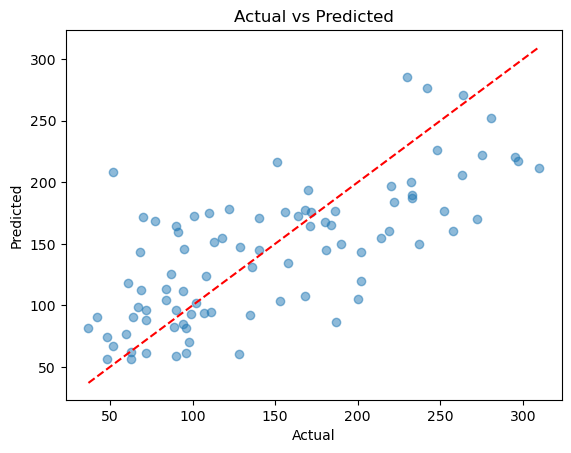

In [2]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

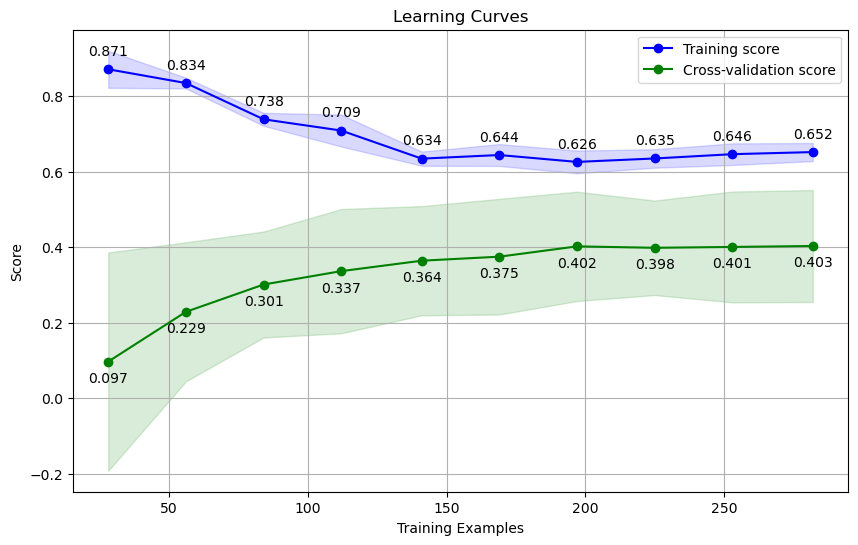

In [3]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_scaled, y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, n_jobs=-1)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

# Add numerical values
for i, (train_val, test_val) in enumerate(zip(train_mean, test_mean)):
    plt.annotate(f'{train_val:.3f}', (train_sizes[i], train_val), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{test_val:.3f}', (train_sizes[i], test_val), textcoords="offset points", xytext=(0,-15), ha='center')

plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# GridsearchCV

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

grid = GridSearchCV(
    MLPRegressor(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_scaled, y_train)

print("Best R2 Score:", grid.best_score_)
print("Best Params  :", grid.best_params_)

# Evaluasi model
y_pred = grid.predict(X_test_scaled)
print('R2 Score:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best R2 Score: 0.4062347220848078
Best Params  : {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (64, 32), 'learning_rate': 'constant', 'solver': 'adam'}
R2 Score: 0.49082667520577483
MSE: 2697.6775410565356


c:\Users\Formylife\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
